# Named Entity Recognition

Named-entity recognition (NER)goes by many names such as entity identification, entity chunking or entity extraction is a task involving extraction of information from corpus of textual data. NER aims to locate and classify named entity mentioned in unstructured text into pre-defined categories such as person names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

# Dependencies

In [ ]:
-nltk
-spacy
-collections
-en_core_web_sm

In [37]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

# Data dependencies

In [36]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
text = '''European authorities fined Google a record $5.1 billion on Wednesday for
abusing its power in the mobile phone market and ordered the company to alter its practices'''

[nltk_data] Downloading package punkt to /home/codersarts/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codersarts/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Tokenization & Parts Of Speech tagging

This involves spliting the sentences into word tokens and extraction pos features from them

In [38]:
tokens = nltk.word_tokenize(text)
pos_text = nltk.pos_tag(tokens)
pos_text[:5]

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT')]

# Tree Visualization

The next portion involves visualization of relation between different pos tages in a tree representation 

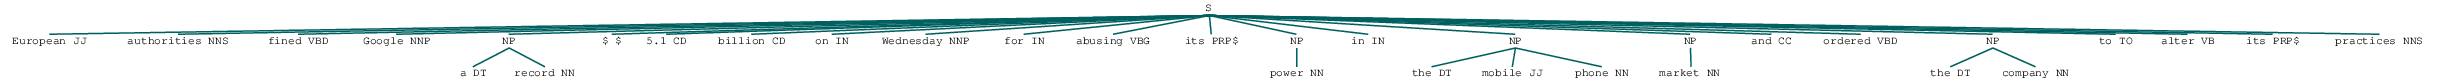

In [40]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'
content_parser = nltk.RegexpParser(pattern)
parsed_tree = content_parser.parse(pos_text)
parsed_tree

In [25]:
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


In [46]:
loc ='/home/codersarts/Desktop/IndiGo.txt'
file = open(loc, mode='rt', encoding='utf-8')
article = file.read()
file.close()

str

# Loading Model

The model i have used for the sake of this article is en_core_web_sm, which comes alongside SpaCy.It consists of English multi-task CNN trained on OntoNotes, with GloVe vectors trained on Common Crawl. Assigns word vectors, context-specific token vectors, POS tags, dependency parse and named entities.

In [50]:
model = en_core_web_sm.load()
doc = model(article)
pprint([(X.text, X.label_) for X in doc.ents])

[('Kamra', 'ORG'),
 ('Goswami', 'GPE'),
 ('IndiGo', 'GPE'),
 ('Tuesday', 'DATE'),
 ('Kamra', 'PERSON'),
 ('Goswami', 'PERSON'),
 ('20 seconds', 'TIME'),
 ('Mumbai', 'GPE'),
 ('Lucknow', 'GPE'),
 ('Kunal Kamra', 'PERSON'),
 ('a period of six months', 'DATE')]


Named-Entity-Recognition on an article of Indian Express. It should be noted that these models are not perfect but provide near to perfect results.

In [51]:
displacy.render(doc, jupyter=True, style='ent')